In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas_datareader.data import DataReader

In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [8]:
tech_list = ['AAPL','GOOG','MSFT']

In [9]:
end = datetime.now() #from todays date excluding d last year
start = datetime(end.year-1,end.month,end.day)

In [14]:
for stock in tech_list:   #for grabing d data 
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [15]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-08,201.399994,198.410004,200.809998,200.020004,25338600.0,197.661011
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,198.866638
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,200.833160
2019-07-11,204.389999,201.710007,203.309998,201.750000,20191800.0,199.370621
2019-07-12,204.000000,202.199997,202.449997,203.300003,17595200.0,200.902344


In [16]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,272.731107,266.461898,269.205296,269.882687,3.470043e+07,268.660670
std,47.277080,46.147501,46.567737,46.859106,1.711015e+07,47.412113
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,227.789993,223.889999,225.639999,224.399994,2.358080e+07,222.784500
50%,270.070007,264.700012,267.269989,267.250000,2.970670e+07,265.897461
75%,315.500000,307.239990,310.600006,310.130005,4.052910e+07,309.540009
max,378.619995,372.230011,375.410004,373.850006,1.067212e+08,373.850006


In [17]:
ma_day = [10,20,50] #taking avg. of no. days

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

In [23]:

stocks = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [24]:
stocks.head()

Symbols,AAPL,GOOG,MSFT
Date,,,
2019-07-08,197.661011,1116.349976,135.295151
2019-07-09,198.866638,1124.829956,134.801239
2019-07-10,200.833160,1140.479980,136.174347
2019-07-11,199.370621,1144.209961,136.717636
2019-07-12,200.902344,1144.900024,137.211563


In [25]:
N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

Symbols,AAPL,GOOG,MSFT
Date,,,
2019-07-09,0.609947,0.759617,-0.365062
2019-07-10,0.988865,1.391324,1.018617
2019-07-11,-0.728236,0.327054,0.398966
2019-07-12,0.768279,0.060309,0.361275
2019-07-15,0.939494,0.475146,0.000000


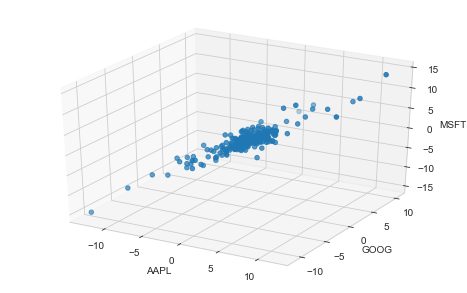

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,5)).gca(projection='3d')
fig.scatter(delta.AAPL,delta.GOOG,delta.MSFT)
fig.set_xlabel('AAPL')
fig.set_ylabel('GOOG')
fig.set_zlabel('MSFT')
plt.show()

In [37]:
meanValue = delta.mean() #calculating using Mahalanobis 
print(meanValue)

Symbols
AAPL    0.284594
GOOG    0.139801
MSFT    0.203602
dtype: float64


In [38]:
CovValue = delta.cov()
print(CovValue)

Symbols      AAPL      GOOG      MSFT
Symbols                              
AAPL     6.525340  4.873357  5.714920
GOOG     4.873357  5.316174  5.001521
MSFT     5.714920  5.001521  6.470281


C:\Users\Shantanu\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shantanu\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


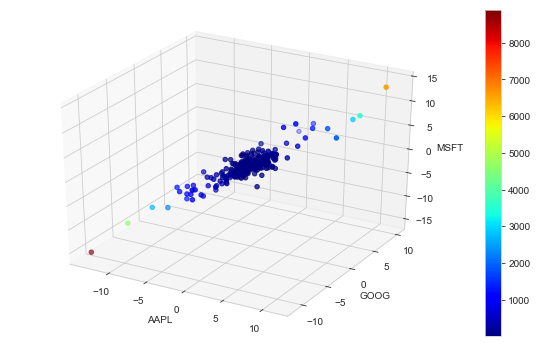

In [40]:
from numpy.linalg import inv

X = delta.as_matrix()
S = covValue.as_matrix()
for i in range(3):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.AAPL,delta.GOOG,delta.MSFT,c=anomaly_score,cmap='jet')
ax.set_xlabel('AAPL')
ax.set_ylabel('GOOG')
ax.set_zlabel('MSFT')
fig.colorbar(p)
plt.show()

In [44]:
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(2,'Anomaly score')

,AAPL,GOOG,MSFT,Anomaly score
Date,,,,
2020-03-16,-13.433882,-11.380421,-15.146236,8890.478757
2020-03-13,11.411637,9.122049,13.809678,6602.021006
